In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
import pandas as pd
import glob
import sipm.util.functions as func
from datetime import datetime
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
!pwd

/home/as111/sipm-analysis


In [3]:
# data folder
path = "/scratch/gpfs/as111/results/2023-12-13"
data_spe = {}
channels = np.arange(8)
volt = 96
for ch in channels:
    data_spe[ch] = {'n_spe_wfs':0, 'avg_spe_wf':np.zeros(0), 'time':np.zeros(0)}
    files = glob.glob(f"{path}/*volt_{volt}*laser_waveform_liq5.h5")
    print(files)
    for f in files:
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_spe[ch]['n_spe_wfs'] += np.array(df['n_spe_wfs'])[0]
        if data_spe[ch]['time'].shape[0]==0:
            data_spe[ch]['time'] = np.array(df['time'])
        if np.array(df['n_spe_wfs'])[0]>0:
            if data_spe[ch]['avg_spe_wf'].shape[0]==0:
                data_spe[ch]['avg_spe_wf'] = np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
            else:
                data_spe[ch]['avg_spe_wf'] += np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
    df = None
    if data_spe[ch]['n_spe_wfs']>0:
        data_spe[ch]['avg_spe_wf'] /= data_spe[ch]['n_spe_wfs']

['/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run3_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run0_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run4_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run2_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run5_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run7_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run8_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run9_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_96_light_laser_cond_ar_run6_laser_waveform_liq5.h5', '/scratch/gpfs/as1

ch0 96V 54673 waveforms selected
ch1 96V 85684 waveforms selected
ch2 96V 75519 waveforms selected
ch3 96V 96684 waveforms selected
ch4 96V 101214 waveforms selected
ch5 96V 77950 waveforms selected
ch6 96V 38606 waveforms selected
ch7 96V 33344 waveforms selected


Text(0.07, 0.5, 'Amplitude (ADC Unit)')

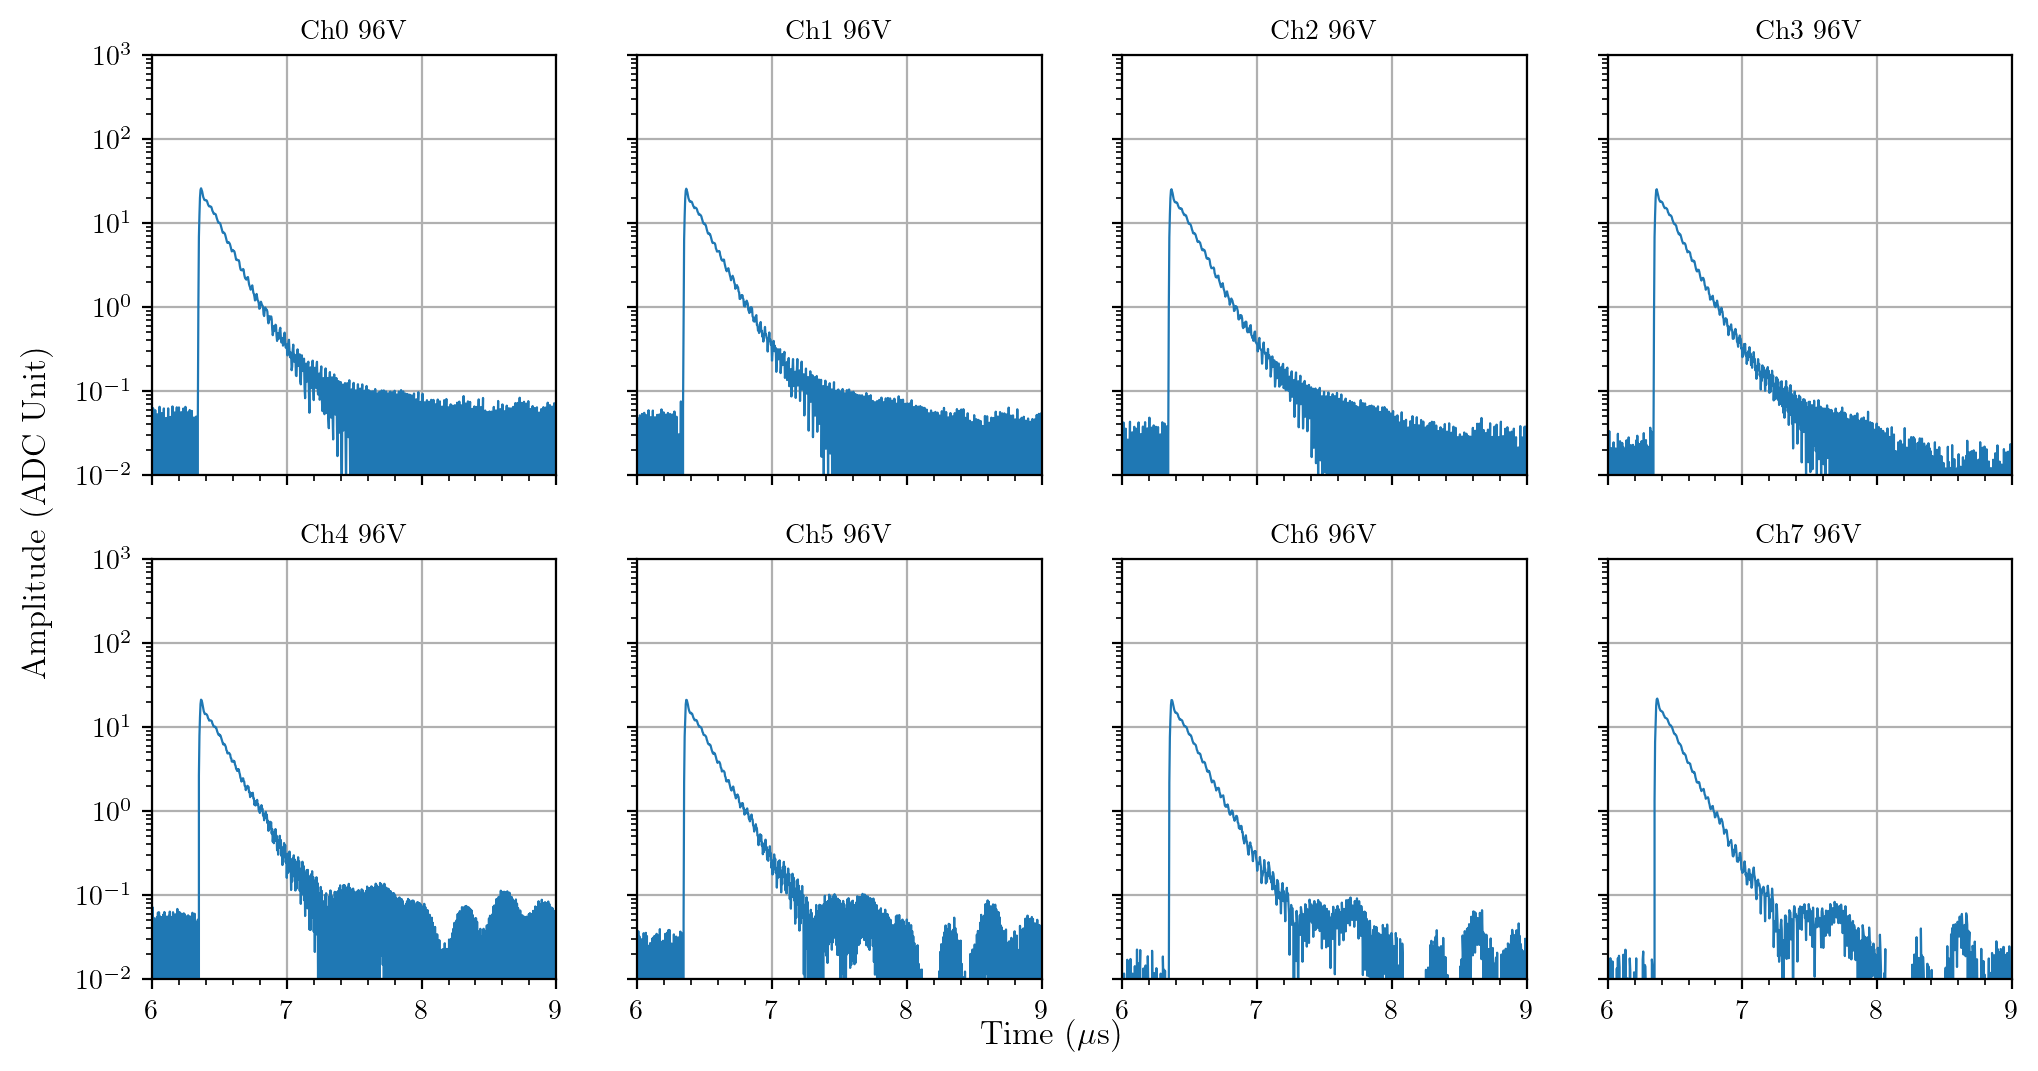

In [4]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    if data_spe[ch]['n_spe_wfs']>0:
        print(f'ch{ch} {volt}V {data_spe[ch]["n_spe_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_spe[ch]['time'],
            data_spe[ch]['avg_spe_wf'],linewidth=0.8)
    axs[j//4, j%4].set_xlim(6, 9)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch} {volt}V')
fig.supxlabel(r'Time ($\mu$s)', y=0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## FFT

Text(0.07, 0.5, 'FFT Abs. Amplitude (ADC Unit)')

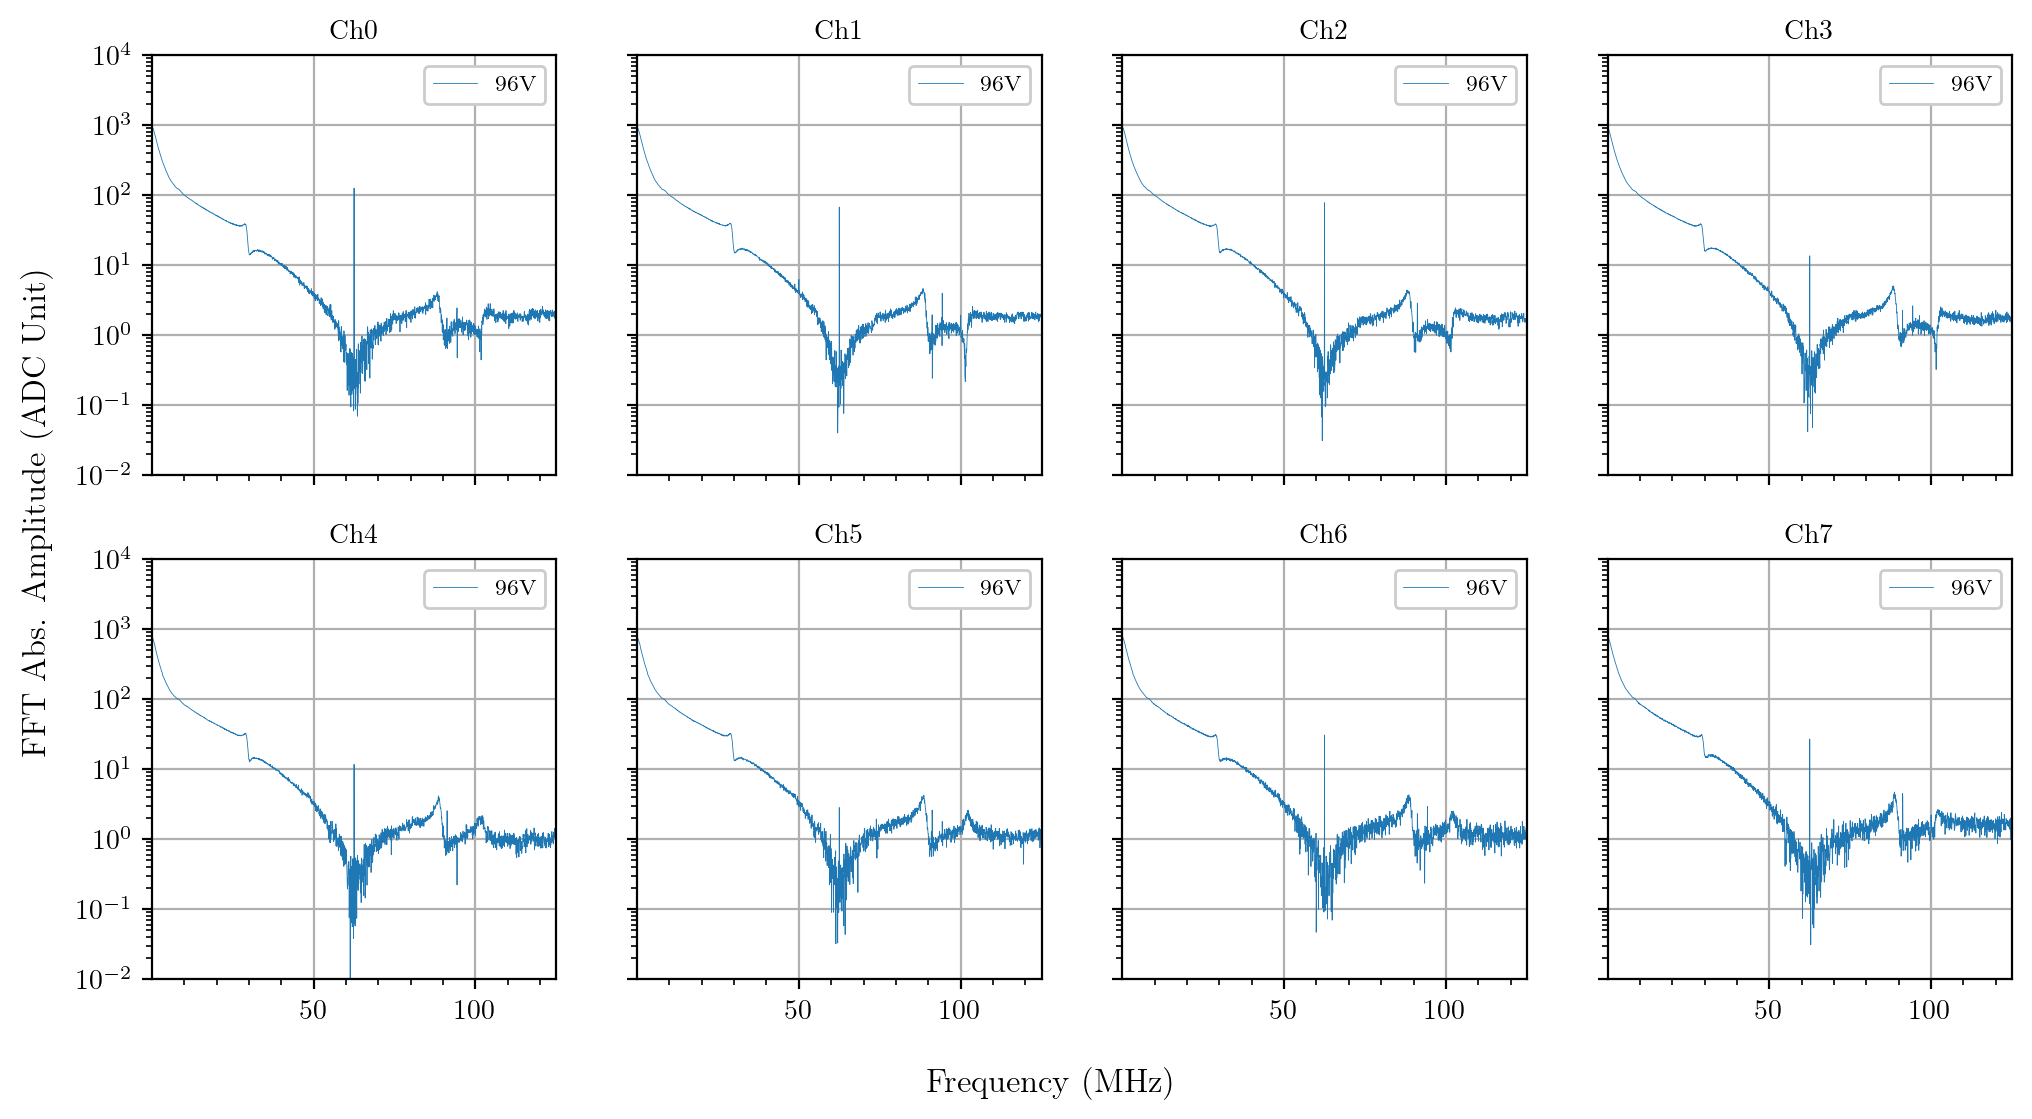

In [5]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    data_spe[ch]['fft_spe_wf'] = fft(data_spe[ch]['avg_spe_wf'])
    dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
    t_total = dt+data_spe[ch]['time'][-1]
    n_over_2 = int(data_spe[ch]['time'].shape[0]/2)
    data_spe[ch]['frequency'] = data_spe[ch]['time']/dt/t_total
    axs[j//4, j%4].plot(
        data_spe[ch]['frequency'][:n_over_2],
        abs(data_spe[ch]['fft_spe_wf'][:n_over_2]),
        label=f'{volt}V', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right')
    axs[j//4, j%4].set_xlim(data_spe[ch]['frequency'][1], data_spe[ch]['frequency'][n_over_2])
    axs[j//4, j%4].set_ylim(1e-2, 1e4)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Frequency (MHz)', y=0.01)
fig.supylabel(r'FFT Abs. Amplitude (ADC Unit)', x=0.07)

# Fit: exponential pulses with time jitter
Scintillation pulse (one component):
$$h(t,t') = A e^{-\frac{t-t'}{\tau}} \Theta(t-t')$$
Time jitter:
$$g(t') = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(t'-t_0)^2}{2\sigma^2}}$$
Average waveform:
$$
f(t,t') = \int g(t') h(t,t') \, dt'
= \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{(t'-t_0)^2}{2\sigma^2}-\frac{t-t'}{\tau}} \, dt'$$

$$ = \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t^{'2} - 2t'(t_0 + \sigma^2/\tau) + t_0^2 + 2\sigma^2 t_0/\tau + \sigma^4 /\tau^2 + 2\sigma^2 (t-t_0)/\tau - \sigma^4/\tau^2]} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sigma\sqrt{2\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t'-(t_0 + \sigma^2/\tau)]^2} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sqrt{\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t/\sigma\sqrt{2}} e^{-[x'-\frac{t_0 + \sigma^2/\tau}{\sigma\sqrt{2}}]^2} \, dx'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{2} e^{-\frac{t-t_0}{\tau}} \left[1 + erf\left(\frac{t-t_0-\sigma^2/\tau}{\sigma\sqrt{2}}\right)\right]
$$
We include two scintillation pulse components with distinct $\tau$.

In [6]:
def template(t, a_1, tau_1, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0)

In [7]:
# Fit SPE average waveform
for j, ch in enumerate(channels):
    pretrg = 5 #us
    err = np.std(data_spe[ch]['avg_spe_wf'][data_spe[ch]['time']<pretrg])
    fit_range = [6.2,7.5] #us
    range_arr = (data_spe[ch]['time']<fit_range[1])&(data_spe[ch]['time']>fit_range[0])
    # print(pos,ch,volt)
    # print(data_spe[pos][ch][volt]['time'][range_arr])
    # print(data_spe[pos][ch][volt]['avg_spe_wf'][range_arr])
    popt,pcov = curve_fit(
        template,
        data_spe[ch]['time'][range_arr], 
        data_spe[ch]['avg_spe_wf'][range_arr], 
        p0=[20, 0.15, 0.005, 6.35], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    data_spe[ch]['pars'] = popt
    data_spe[ch]['cov'] = pcov
    print(popt)

[2.66167074e+01 1.44283211e-01 4.97930910e-03 6.35185738e+00]
[2.56761106e+01 1.46065134e-01 4.74816181e-03 6.35188345e+00]
[2.50906257e+01 1.50099143e-01 4.67454231e-03 6.35143866e+00]
[2.54468076e+01 1.45563786e-01 4.74543817e-03 6.35155238e+00]
[2.05489709e+01 1.49445670e-01 4.55049266e-03 6.35348455e+00]
[2.08991980e+01 1.46600874e-01 4.64097436e-03 6.35384332e+00]
[2.10758445e+01 1.46315334e-01 4.74872898e-03 6.35404681e+00]
[2.21230703e+01 1.40661737e-01 4.80273222e-03 6.35506822e+00]


# Triplet lifetime
Here the average waveforms are deconvolved channel-by-channel using their respective SPE pulse shapes.
The deconvolved waveform is given by
$$f_{deconv}(t) = \mathcal{F}^{-1}\left(\frac{\mathcal{F}(f_{original}(t))}{\mathcal{F}(f_{SiPM}(t))}\right)$$
Note that the SiPM pulse shape has to be shifted such that the trigger for it is at $t=0$.<br>

The average waveforms are selected from the events with $0.1<F_{\rm prompt}<0.5$ and $20<N_{\rm PE}<200$ ($100<N_{\rm PE}<1000$) for the top (bottom), corresponding to an energy range of $100$ keV $\lesssim E \lesssim 1000$ keV

In [8]:
path = "/scratch/gpfs/as111/results/"
dates = ['2023-12-14','2023-12-18','2023-12-19']
files = []
for d in dates:
    files.extend(glob.glob(f"{path}{d}/*scintillation_waveform_liq5.h5"))
print(files)
print(len(files))

['/scratch/gpfs/as111/results/2023-12-14/2023-12-14_volt_96_light_scintillation_cond_backgrounds_run4_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-14/2023-12-14_volt_96_light_scintillation_cond_backgrounds_run0_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-14/2023-12-14_volt_96_light_scintillation_cond_backgrounds_run1_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-14/2023-12-14_volt_96_light_scintillation_cond_backgrounds_run2_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-14/2023-12-14_volt_96_light_scintillation_cond_backgrounds_run3_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-18/2023-12-18_volt_96_light_scintillation_cond_backgrounds_run0_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-19/2023-12-19_volt_96_light_scintillation_cond_backgrounds_run5_scintillation_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-19/2023-12-19_volt_96_li

In [9]:
# data folder
data_scint = {}
date_time = {}
channels = np.arange(8)
volt = 96
for f in files:
    data_scint[f] = {}
    df = pd.read_hdf(f, key=f'{volt}/-1')
    date_time[f] = datetime(*np.array(df['start_datetime'][:6]).astype(int))
    for ch in channels:
        data_scint[f][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_scint[f][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
        if data_scint[f][ch]['time'].shape[0]==0:
            data_scint[f][ch]['time'] = np.array(df['time'])
        if data_scint[f][ch]['avg_scint_wf'].shape[0]==0:
            data_scint[f][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'])*np.array(df['n_scint_wfs'])[0]
        else:
            data_scint[f][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'])*np.array(df['n_scint_wfs'])[0]
        df = None
        data_scint[f][ch]['avg_scint_wf'] /= data_scint[f][ch]['n_scint_wfs']
# sort according to date time
args = np.array(list(date_time.values())).argsort()
files = np.array(files)[args]

2023-12-14 14:21:02 ch0 5158 waveforms selected
2023-12-14 19:38:21 ch0 5955 waveforms selected
2023-12-15 00:51:26 ch0 6723 waveforms selected
2023-12-15 06:03:59 ch0 6981 waveforms selected
2023-12-15 11:15:52 ch0 7236 waveforms selected
2023-12-18 11:56:11 ch0 11931 waveforms selected
2023-12-19 10:09:44 ch0 12741 waveforms selected
2023-12-19 13:20:43 ch0 12181 waveforms selected
2023-12-19 16:31:57 ch0 12639 waveforms selected
2023-12-19 19:42:57 ch0 12302 waveforms selected
2023-12-19 22:54:09 ch0 12494 waveforms selected
2023-12-20 02:05:10 ch0 12508 waveforms selected
2023-12-20 05:16:10 ch0 12424 waveforms selected
2023-12-20 08:27:20 ch0 12650 waveforms selected
2023-12-20 11:38:18 ch0 12765 waveforms selected
2023-12-20 14:49:17 ch0 12455 waveforms selected
2023-12-20 18:00:31 ch0 12738 waveforms selected
2023-12-20 21:11:24 ch0 12965 waveforms selected
2023-12-21 00:22:17 ch0 13149 waveforms selected
2023-12-21 03:33:14 ch0 13016 waveforms selected
2023-12-21 06:44:04 ch0 1

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

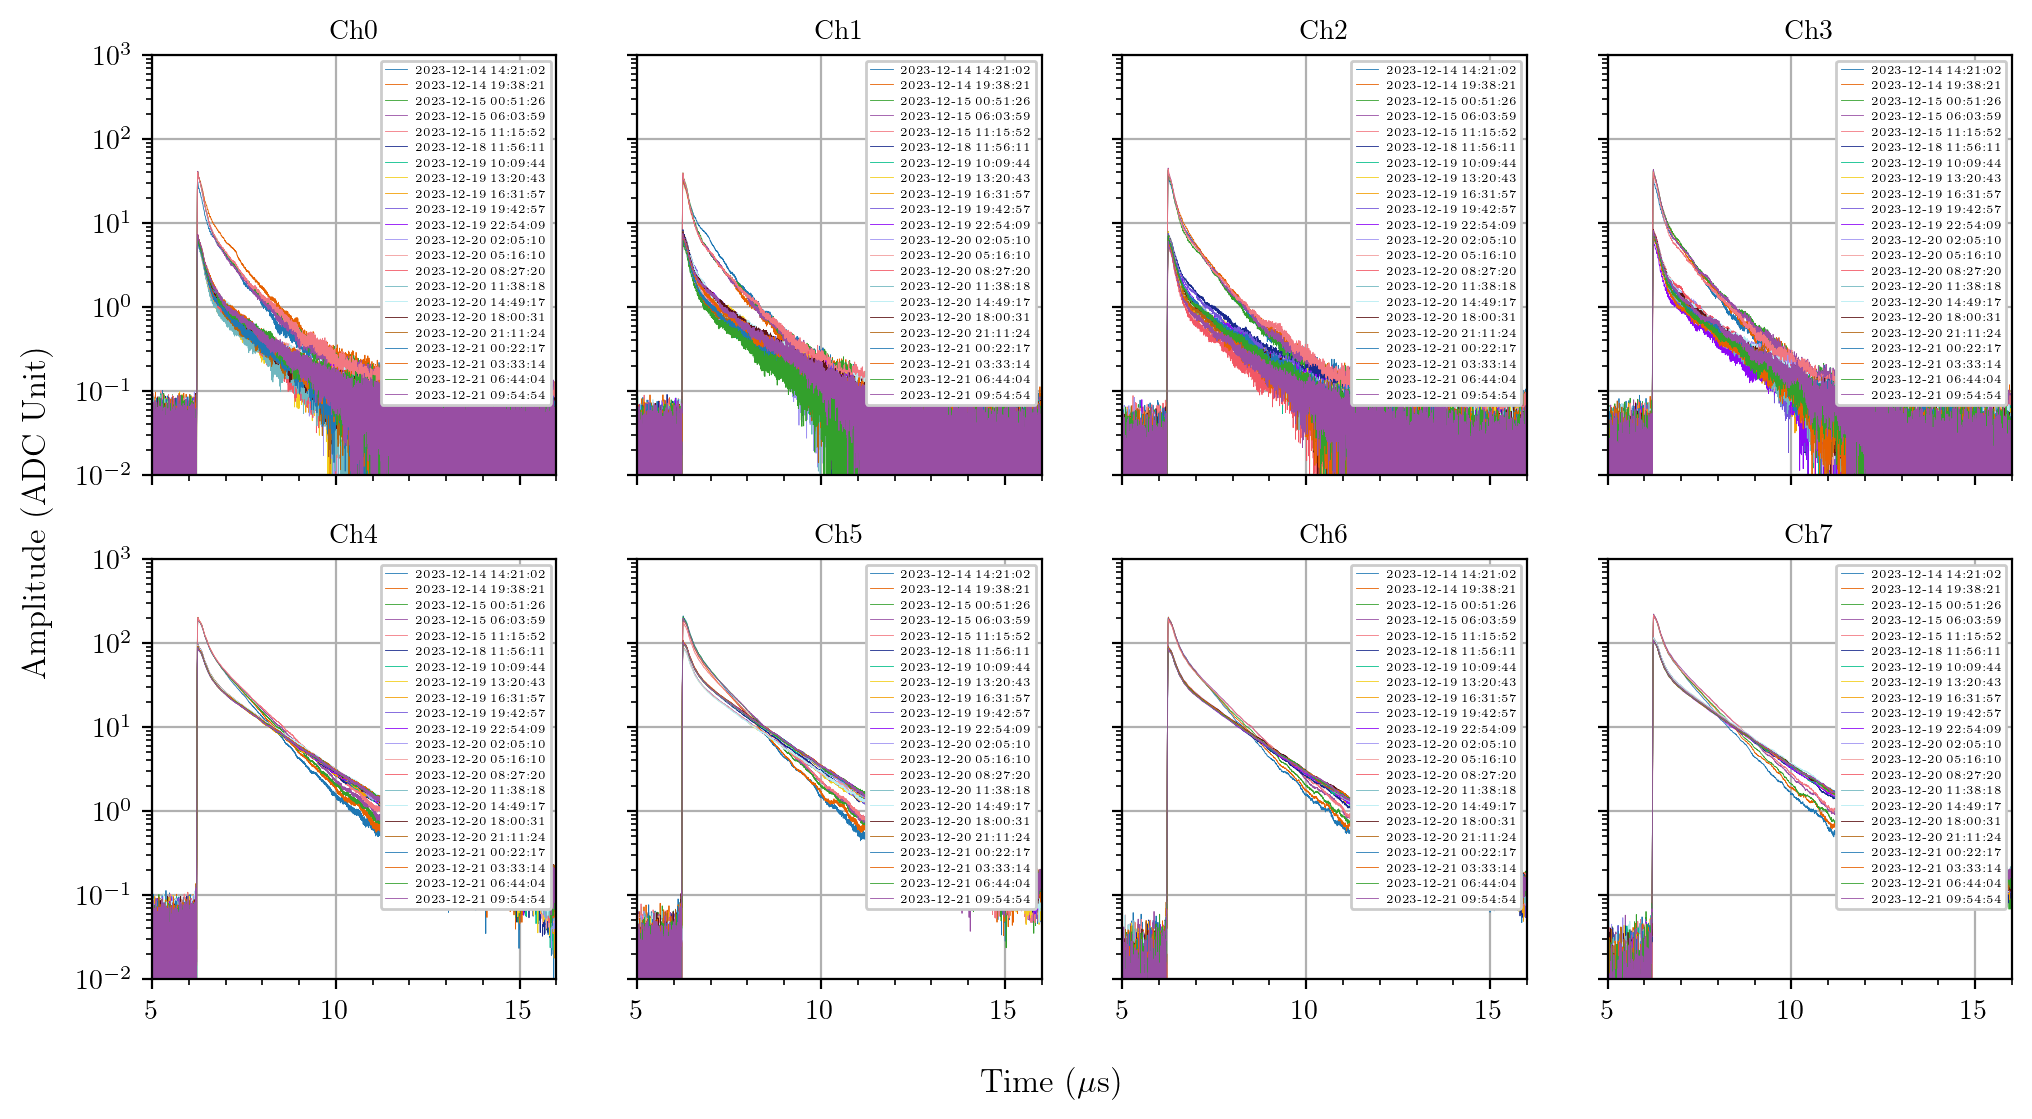

In [10]:
# Make plots for all datasets
# Average LAr scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        print(f'{date_time[f]} ch{ch} {data_scint[f][ch]["n_scint_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_scint[f][ch]['time'],
            data_scint[f][ch]['avg_scint_wf'],
            label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right',fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Deconvolution

In [11]:
# Deconvolution channel by channel
for i, f in enumerate(files):
    for j, ch in enumerate(channels):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
            shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch]['pars'][3]/dt))) for freq in data_spe[ch]['frequency']])
            data_scint[f][ch]['deconv'] = ifft(fft(data_scint[f][ch]['avg_scint_wf'])/data_spe[ch]['fft_spe_wf']*shift).real

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

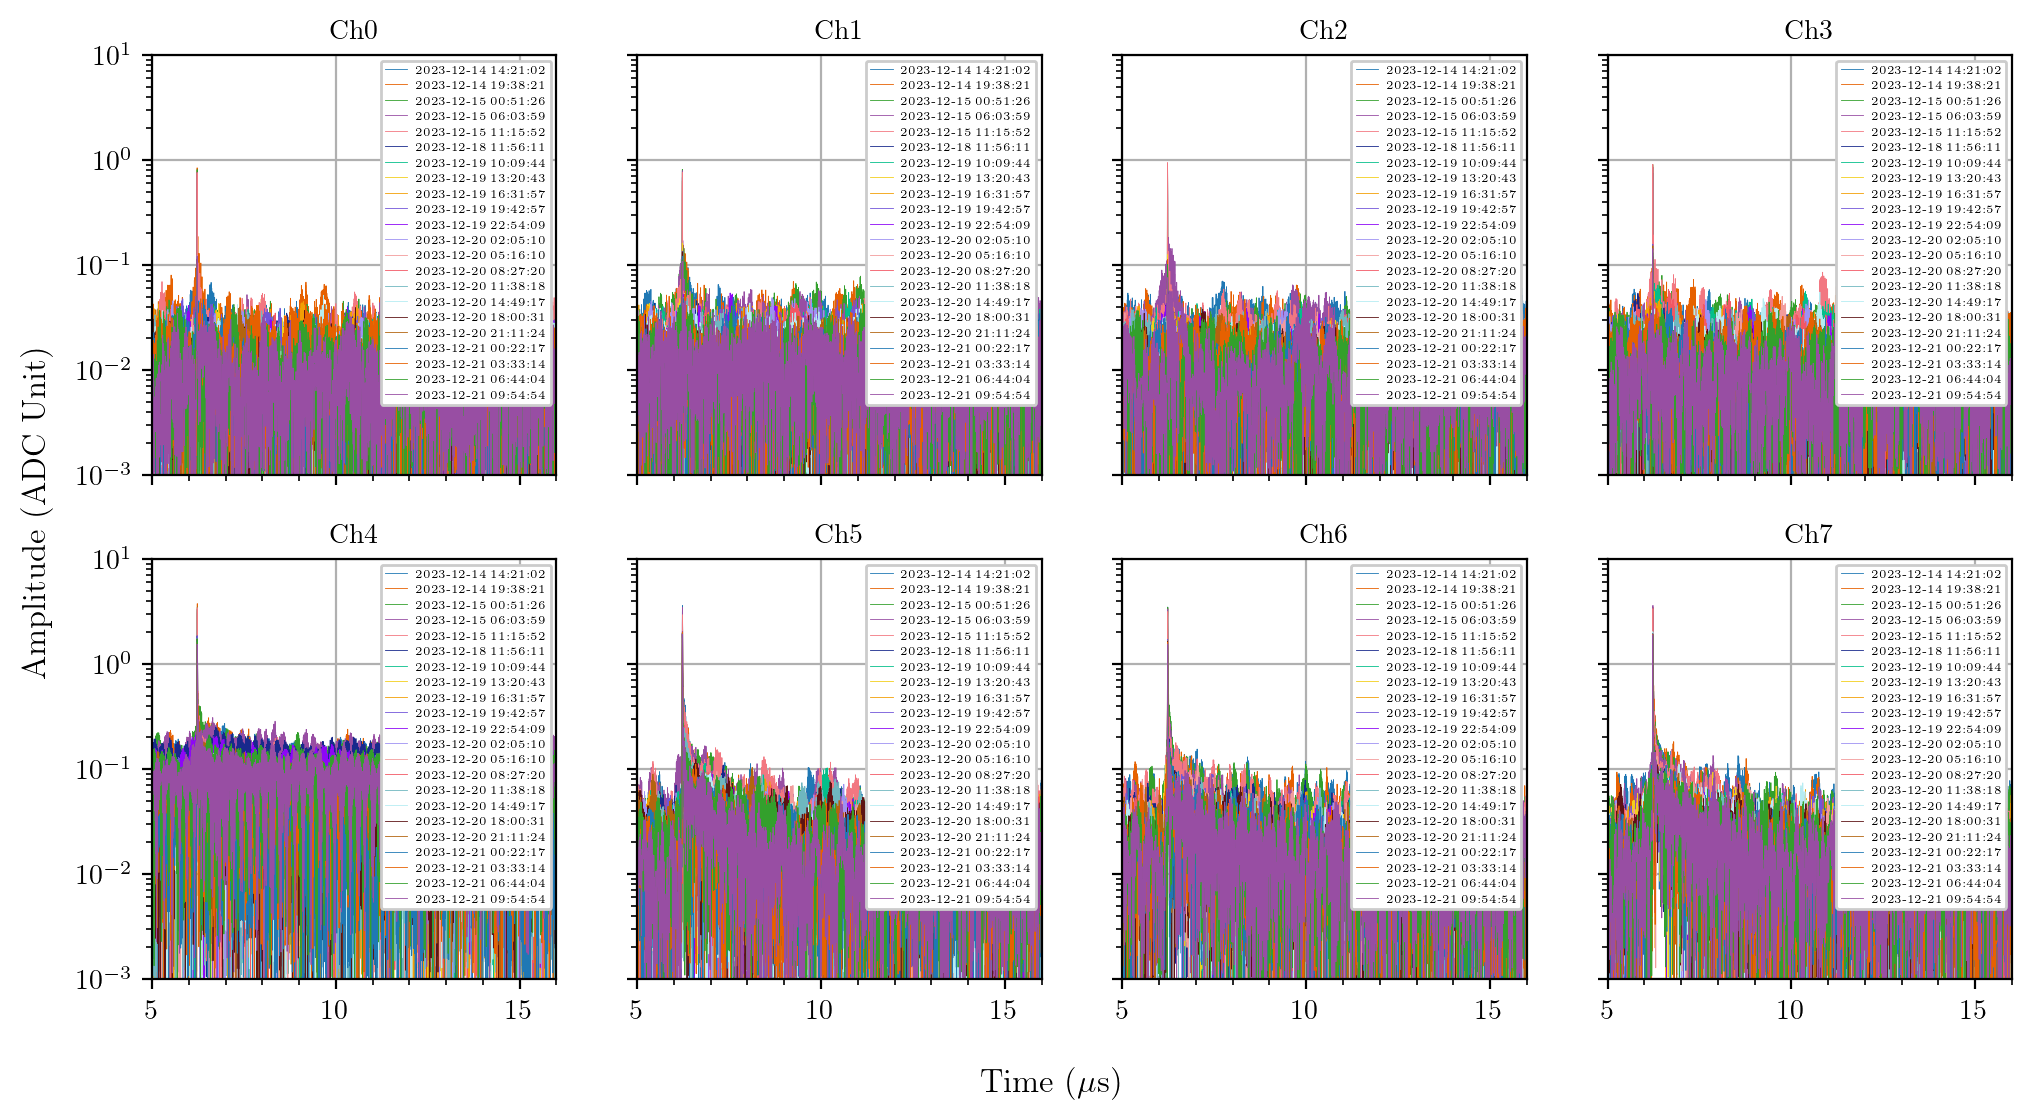

In [12]:
# Make plots for all datasets
# Deconvolved scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            axs[j//4, j%4].plot(
                data_scint[f][ch]['time'],
                abs(data_scint[f][ch]['deconv']),
                label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right', fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-3, 1e1)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Summation
Only sum CH4-7 (without fused silica windows)

In [13]:
for f in files:
    data_scint[f][-1] = {'time': data_scint[f][0]['time'], 'sum_wf': np.zeros(data_scint[f][0]['time'].shape[0])}
    for ch in channels[-4:]:
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            data_scint[f][-1]['sum_wf'] += data_scint[f][ch]['deconv']

Text(0.02, 0.5, 'Amplitude (ADC Unit)')

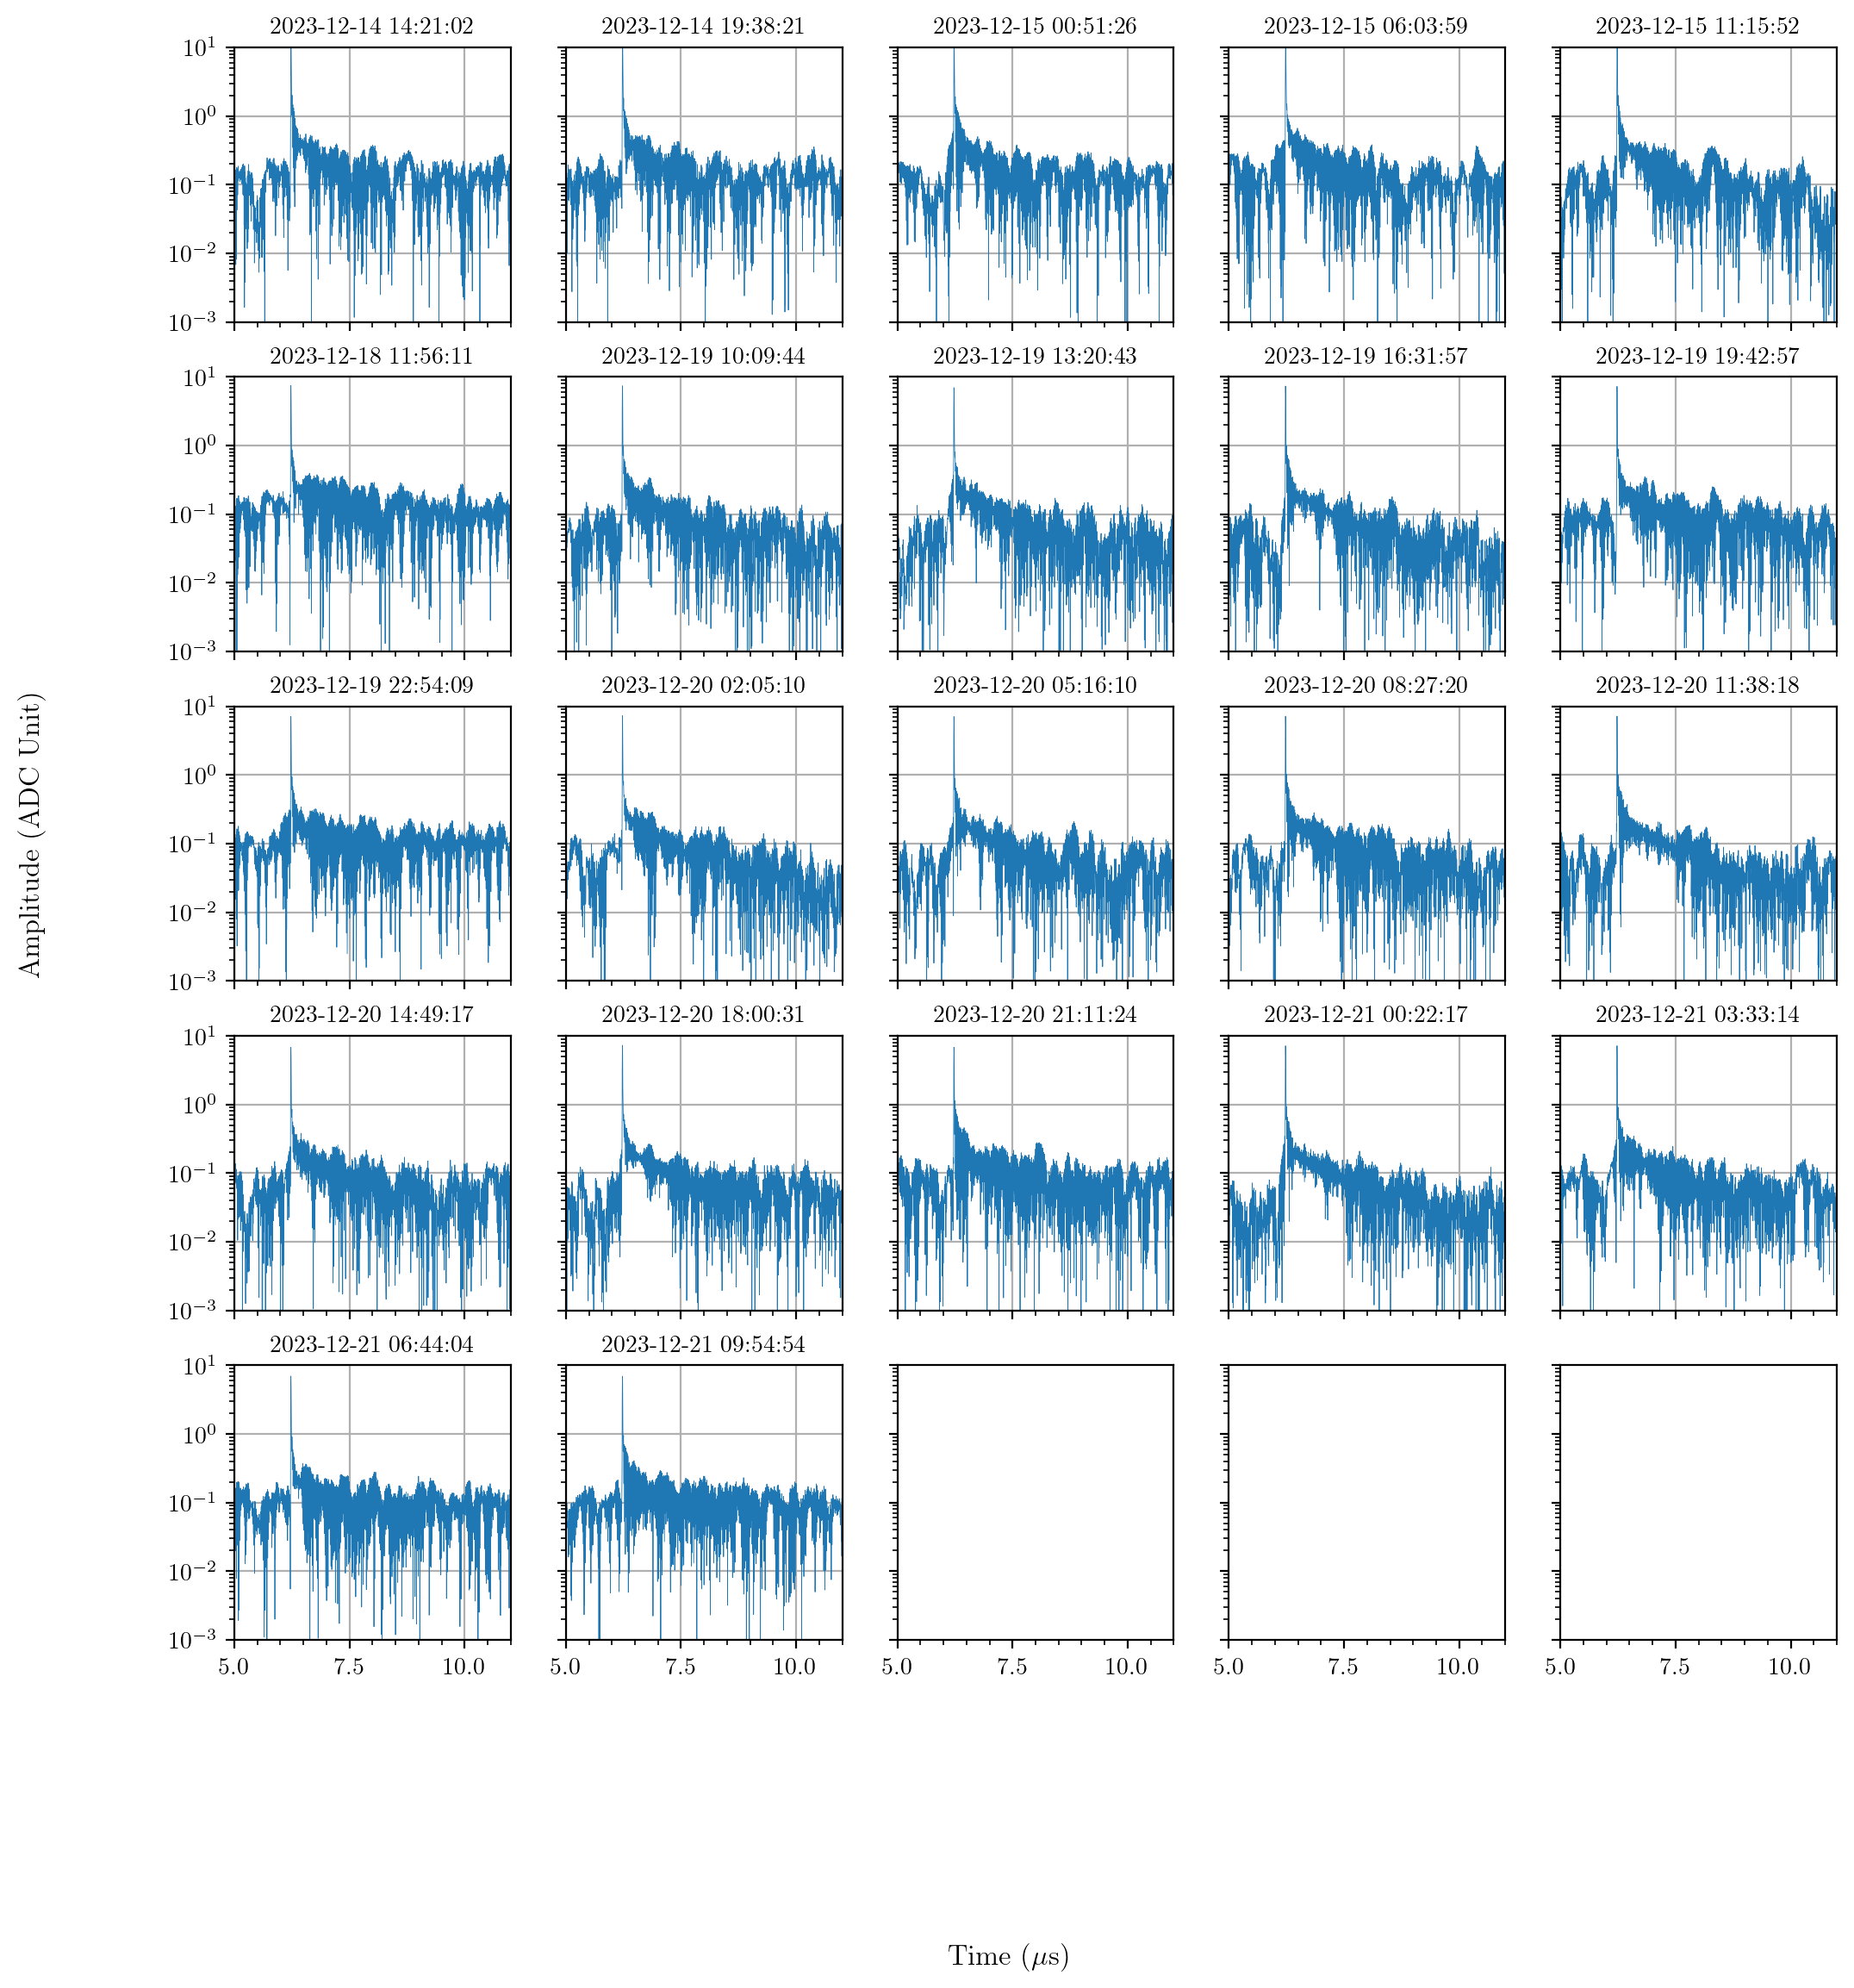

In [14]:
# Make plots for all datasets
# Summed scintillation waveform
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True)
fig.set_size_inches(12, 12)
for i, f in enumerate(files):
    axs[i//5, i%5].plot(
                data_scint[f][-1]['time'],
                abs(data_scint[f][-1]['sum_wf']),
                linewidth=0.3)
    axs[i//5, i%5].set_xlim(5, 11)
    axs[i//5, i%5].set_ylim(1e-3, 1e1)
    axs[i//5, i%5].set_yscale('log')
    axs[i//5, i%5].minorticks_on()
    axs[i//5, i%5].grid()
    axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=-0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.02)

## Fitting

In [15]:
def template2(t, a_1, tau_1, a_2, tau_2, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0) + func.pulse_jitter(t, a_2, tau_2, sigma, t0)

In [18]:
# Fit SPE average waveform
for f in files:
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        pretrg = 5 #us
        err = np.std(data_scint[f][-1]['sum_wf'][data_scint[f][-1]['time']<pretrg])
        fit_range = [6.2,8] #us
        range_arr = (data_scint[f][-1]['time']<fit_range[1]) & (data_scint[f][-1]['time']>fit_range[0])
        popt,pcov = curve_fit(
            template2,
            data_scint[f][-1]['time'][range_arr], 
            data_scint[f][-1]['sum_wf'][range_arr], 
            p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        data_scint[f][-1]['pars'] = popt
        data_scint[f][-1]['cov'] = pcov
        print(f'{date_time[f]} As={popt[0]} Ts={popt[1]}us At={popt[2]} Tt={popt[3]}us sigma={popt[4]}us t0={popt[5]}us')

2023-12-14 14:21:02 As=33.438679017050276 Ts=0.0046638196245624465us At=0.654150758365036 Tt=0.5889060946678625us sigma=0.002799014586048145us t0=6.2276846233831336us
2023-12-14 19:38:21 As=33.27426251134259 Ts=0.004634547339633871us At=0.6412084012221224 Tt=0.6027058450879297us sigma=0.002871603567945005us t0=6.227934879099862us
2023-12-15 00:51:26 As=32.372707100815994 Ts=0.004731995804973274us At=0.6309252625779324 Tt=0.6292452061356398us sigma=0.002989858976650352us t0=6.227955261568536us
2023-12-15 06:03:59 As=31.92869098854529 Ts=0.004797183980662376us At=0.635974310041787 Tt=0.6464716481159423us sigma=0.002892588826576246us t0=6.227827063816347us
2023-12-15 11:15:52 As=34.217962524119116 Ts=0.00428731270807108us At=0.6060024733838024 Tt=0.651325994059211us sigma=0.003197416695926266us t0=6.228082094407996us
2023-12-18 11:56:11 As=17.562229350116784 Ts=0.004349363490565311us At=0.3156302241740966 Tt=0.8292058153687734us sigma=0.0027573068436367613us t0=6.225887580160087us
2023-12

/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: invalid value encountered in multiply
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


Text(-0.01, 0.5, 'Amplitude (ADC Unit)')

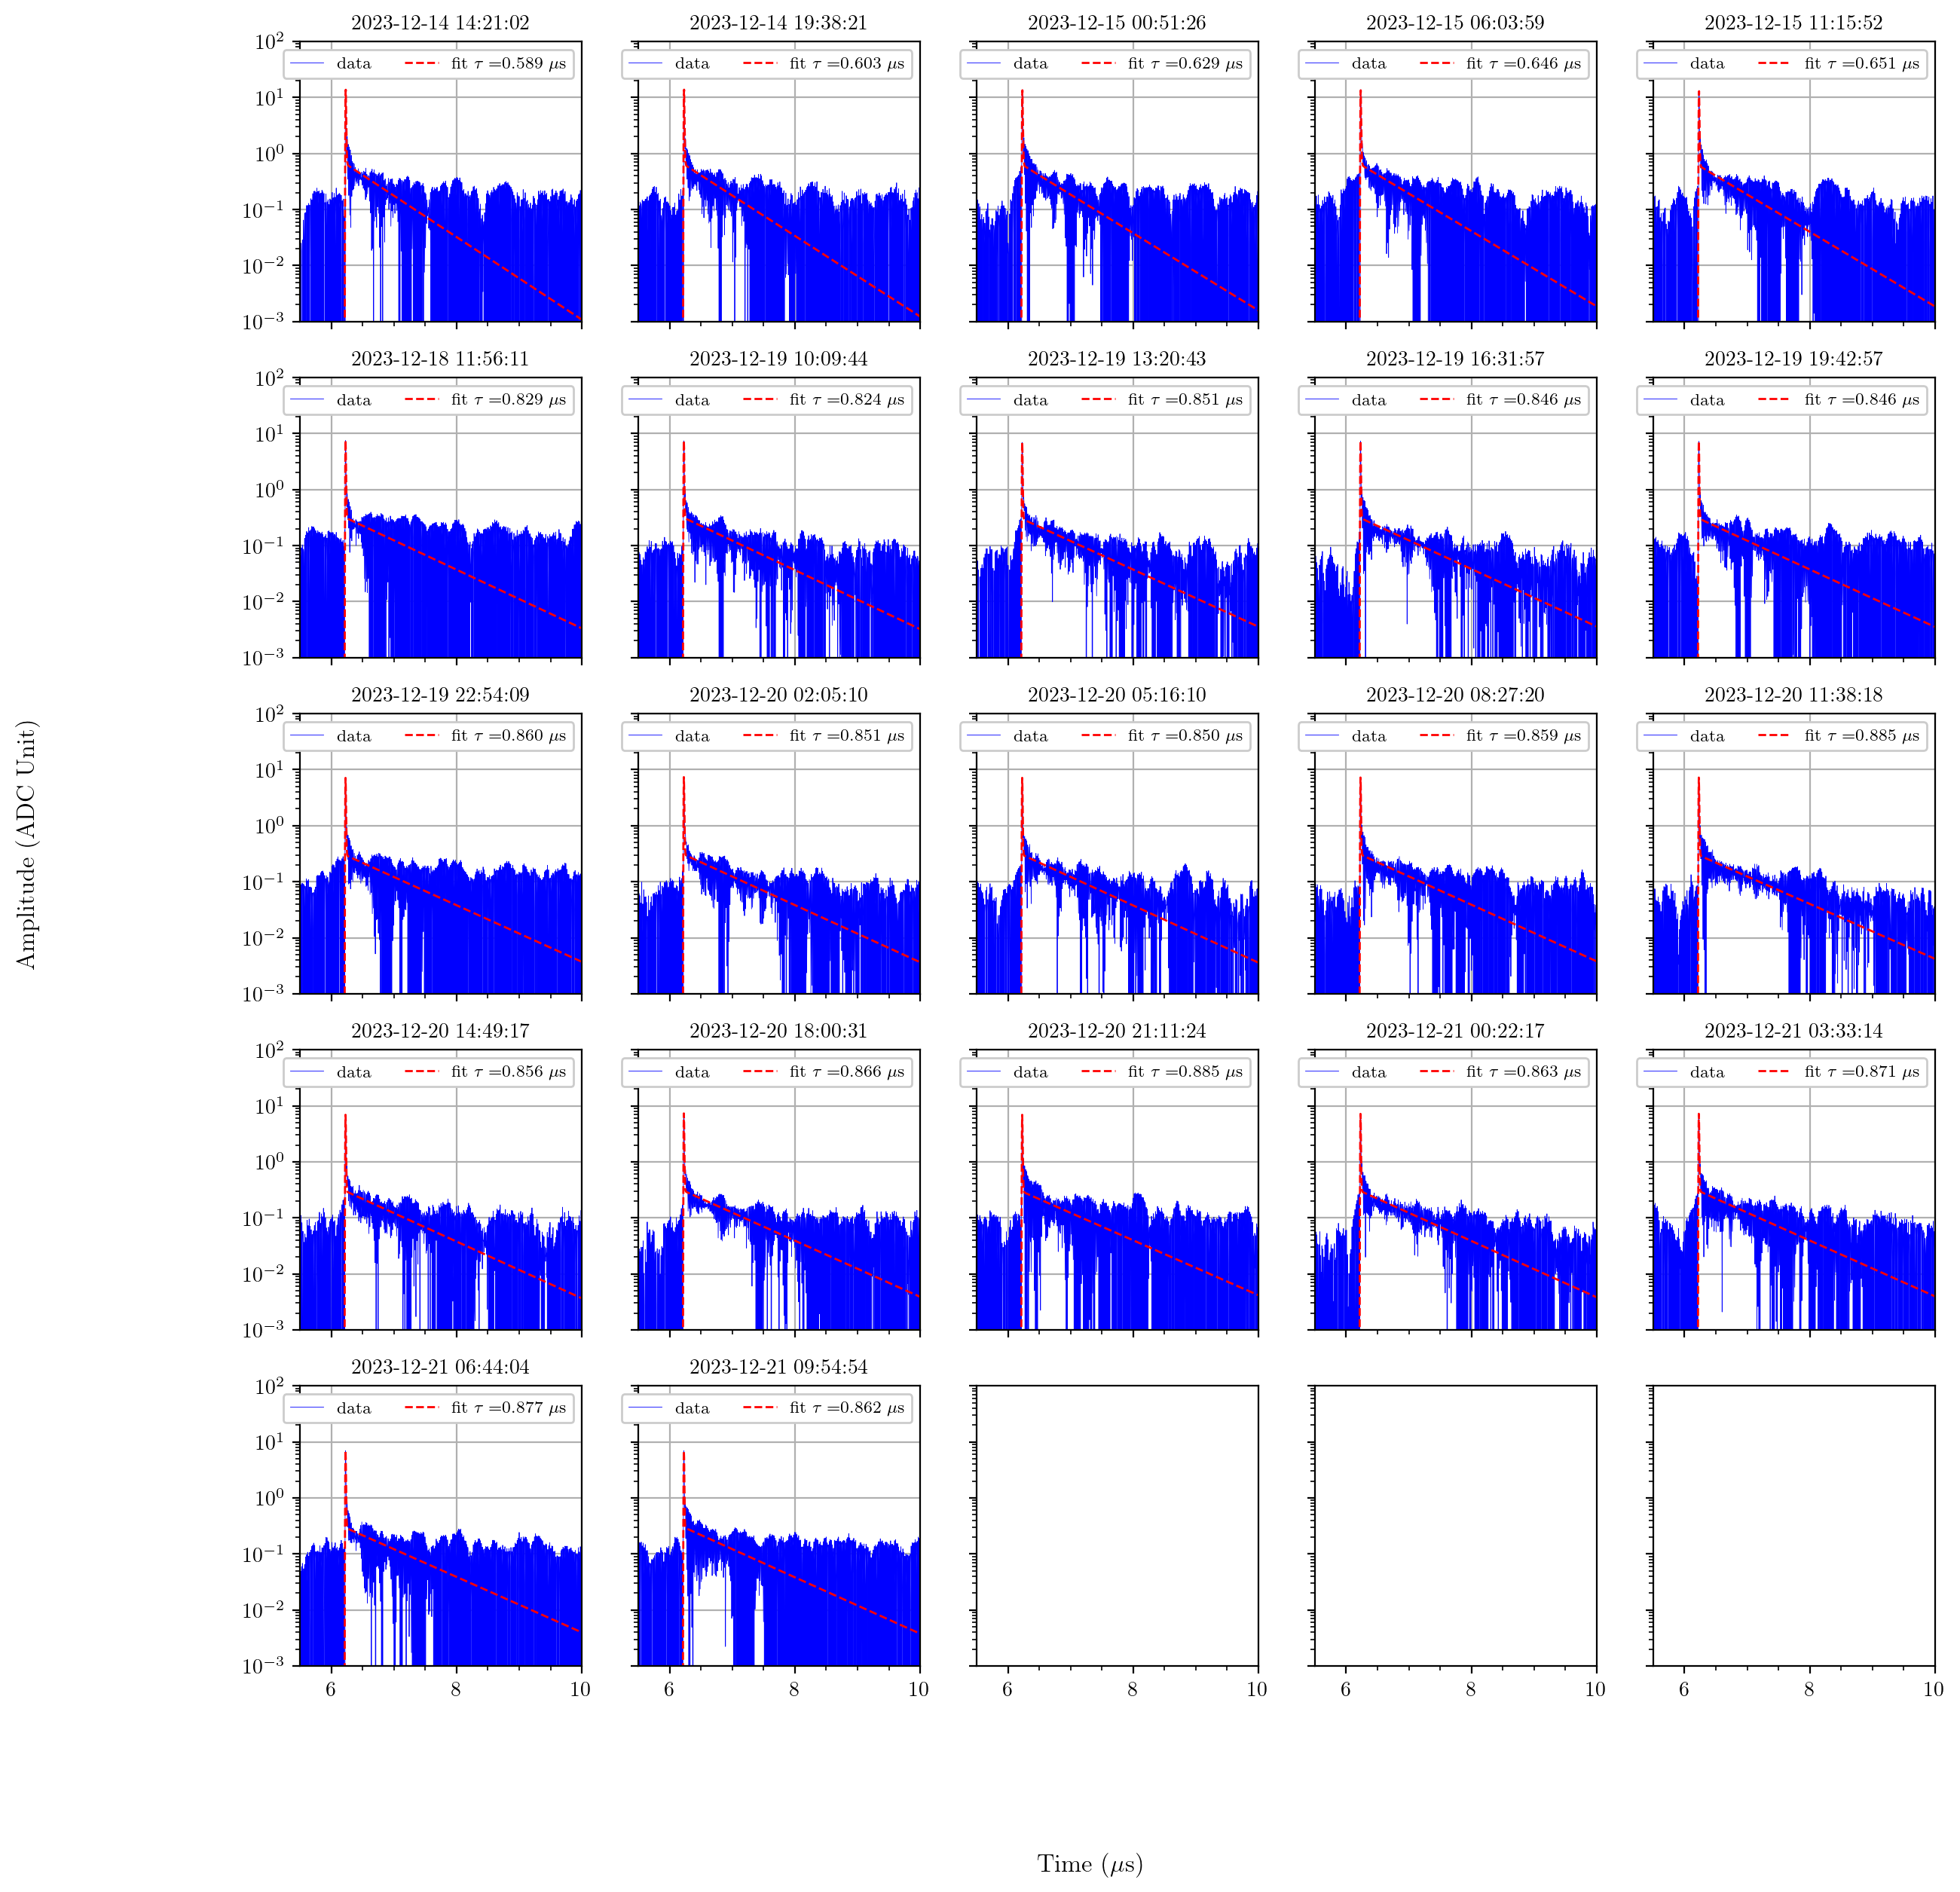

In [19]:
# Make plots for all datasets
# Fitted SPE average waveform
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True)
fig.set_size_inches(14, 14)
for i, f in enumerate(files):
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        axs[i//5, i%5].plot(
            data_scint[f][-1]['time'],
            data_scint[f][-1]['sum_wf'],
            label=f'data', color='b', linewidth=0.3)
        axs[i//5, i%5].plot(
            data_scint[f][-1]['time'],
            template2(data_scint[f][-1]['time'], *data_scint[f][-1]['pars']),
            label=r'fit $\tau=${:.3f} $\mu $s'.format(data_scint[f][-1]['pars'][3]), color='r', linestyle='--', linewidth=1)
        axs[i//5, i%5].legend(loc='upper right',ncol=2)
        axs[i//5, i%5].set_xlim(5.5, 10)
        axs[i//5, i%5].set_ylim(1e-3, 1e2)
        axs[i//5, i%5].set_yscale('log')
        axs[i//5, i%5].minorticks_on()
        axs[i//5, i%5].grid()
        axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=-0.01)

# Triplet lifetime evolution

Get folder paths and days since the getter was turned on

In [21]:
dt_getter = datetime(2023,5,2,16,0,0)
print('The getter was turned on at', dt_getter)

The getter was turned on at 2023-05-02 16:00:00


In [22]:
# Sort datasets
S_PER_DAY = 86400
directory = '/scratch/gpfs/as111/results/'
positions = ['top','bottom']
files_top = glob.glob(f'{directory}2023-05-02/*pos_top*scintillation_waveform.h5') + glob.glob(f'{directory}2023-05-03/*pos_top*scintillation_waveform.h5') + glob.glob(f'{directory}2023-05-04/*pos_top*scintillation_waveform.h5') + glob.glob(f'{directory}2023-05-05/*pos_top*scintillation_waveform.h5')+ glob.glob(f'{directory}2023-05-08/*pos_top*scintillation_waveform.h5')+ glob.glob(f'{directory}2023-05-09/*pos_top*scintillation_waveform.h5')+ glob.glob(f'{directory}2023-05-10/*pos_top*scintillation_waveform.h5') + glob.glob(f'{directory}2023-05-11/*pos_top*scintillation_waveform.h5')
files_bottom = glob.glob(f'{directory}2023-05-04/*pos_bottom*scintillation_waveform.h5') + glob.glob(f'{directory}2023-05-05/*pos_bottom*scintillation_waveform.h5') + glob.glob(f'{directory}2023-05-08/*pos_bottom*scintillation_waveform.h5')+ glob.glob(f'{directory}2023-05-09/*pos_bottom*scintillation_waveform.h5')+ glob.glob(f'{directory}2023-05-10/*pos_bottom*scintillation_waveform.h5')
files = {'top':files_top,'bottom':files_bottom}
datetime_files = {}
sorted_keys = {}
for pos in positions:
    datetime_files[pos] = {}
    for f in files[pos]:
        df = pd.read_hdf(f, key=f'67/-1')
        date_time = datetime(*np.array(df['start_datetime']).astype(int))
        days = (date_time-dt_getter).total_seconds()/S_PER_DAY
        datetime_files[pos][days] = f
    sorted_keys[pos] = list(datetime_files[pos].keys())
    sorted_keys[pos].sort()

In [23]:
data_triplet = {}
channels = [0,1,2,3]
for pos in positions:
    data_triplet[pos] = []
    for sorted_day in sorted_keys[pos]:
        file = datetime_files[pos][sorted_day]
        # Create a new dataset if >30mins apart from the last one
        if len(data_triplet[pos])==0 or sorted_day-data_triplet[pos][-1]['days']>1/48: 
            data_triplet[pos].append({
                'days': sorted_day, 
                'filename': [file], 
                'data':{}
            })
            for ch in channels:
                data_triplet[pos][-1]['data'][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
        else:
            data_triplet[pos][-1]['filename'].append(file)
    # Load data    
    for d in data_triplet[pos]:
        for ch in channels:
            for f in d['filename']:
                df = pd.read_hdf(f, key=f'67/{ch}')
                d['data'][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
                if d['data'][ch]['time'].shape[0]==0:
                    d['data'][ch]['time'] = np.array(df['time'])
                if d['data'][ch]['avg_scint_wf'].shape[0]==0:
                    d['data'][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'])*np.array(df['n_scint_wfs'])[0]
                else:
                    d['data'][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'])*np.array(df['n_scint_wfs'])[0]
                df = None # Clear memory
            d['data'][ch]['avg_scint_wf'] /= d['data'][ch]['n_scint_wfs']
            # Deconvolution
            dt = data_spe[pos][ch][67]['time'][1]-data_spe[pos][ch][67]['time'][0]
            shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[pos][ch][67]['pars'][5]/dt))) for freq in data_spe[pos][ch][67]['frequency']])
            d['data'][ch]['deconv'] = ifft(fft(d['data'][ch]['avg_scint_wf'])/data_spe[pos][ch][67]['fft_spe_wf']*shift).real
        # Summation
        d['data'][-1] = {'time': d['data'][0]['time'], 'sum_wf': np.zeros(d['data'][0]['time'].shape[0])}
        for ch in channels:
            d['data'][-1]['sum_wf'] += d['data'][ch]['deconv']
        # Fitting
        pretrg = 5 #us
        err = np.std(d['data'][-1]['sum_wf'][d['data'][-1]['time']<pretrg])
        fit_range = [5.5,9] #us
        range_arr = (d['data'][-1]['time']<fit_range[1])&(d['data'][-1]['time']>fit_range[0])
        popt,pcov = curve_fit(
            template,
            d['data'][-1]['time'][range_arr], 
            d['data'][-1]['sum_wf'][range_arr], 
            p0=[5, 0.02, 0.5, 0.7, 0.005, 5.65], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        d['data'][-1]['pars'] = popt
        d['data'][-1]['cov'] = pcov
        print(f'{pos} {d["days"]*24:.2f} hours As={popt[0]:.3f} Ts={popt[1]:.5f}us At={popt[2]:.5f} Tt={popt[3]:.3f}us sigma={popt[4]:.5f}us t0={popt[5]:.4f}us')

top -0.55 hours As=6.278 Ts=0.01948us At=0.78383 Tt=0.193us sigma=0.00588us t0=5.6509us
top 0.63 hours As=6.298 Ts=0.01985us At=0.77486 Tt=0.200us sigma=0.00581us t0=5.6508us
top 3.92 hours As=6.246 Ts=0.02009us At=0.74424 Tt=0.221us sigma=0.00581us t0=5.6509us
top 6.94 hours As=6.193 Ts=0.02095us At=0.69596 Tt=0.258us sigma=0.00592us t0=5.6510us
top 9.96 hours As=6.204 Ts=0.02105us At=0.67573 Tt=0.288us sigma=0.00601us t0=5.6510us
top 12.98 hours As=6.128 Ts=0.02185us At=0.65464 Tt=0.325us sigma=0.00576us t0=5.6510us
top 16.00 hours As=6.119 Ts=0.02200us At=0.63913 Tt=0.360us sigma=0.00588us t0=5.6512us
top 20.52 hours As=6.148 Ts=0.02237us At=0.63171 Tt=0.412us sigma=0.00589us t0=5.6512us
top 23.54 hours As=6.108 Ts=0.02266us At=0.62089 Tt=0.449us sigma=0.00578us t0=5.6514us
top 26.56 hours As=6.083 Ts=0.02298us At=0.61908 Tt=0.484us sigma=0.00563us t0=5.6514us
top 29.58 hours As=6.056 Ts=0.02327us At=0.61366 Tt=0.520us sigma=0.00564us t0=5.6514us
top 32.60 hours As=6.123 Ts=0.02341u

In [24]:
# Fit result container
# Initialize
triplet_fit = {}

In [25]:
for pos in positions:
    triplet_fit[pos] = {}
    triplet_fit[pos]['days'] = np.array([d['days'] for d in data_triplet[pos]])
    triplet_fit[pos]['a1'] = np.array([d['data'][-1]['pars'][0] for d in data_triplet[pos]])
    triplet_fit[pos]['tau1'] = np.array([d['data'][-1]['pars'][1] for d in data_triplet[pos]])
    triplet_fit[pos]['a2'] = np.array([d['data'][-1]['pars'][2] for d in data_triplet[pos]])
    triplet_fit[pos]['tau2'] = np.array([d['data'][-1]['pars'][3] for d in data_triplet[pos]])
    triplet_fit[pos]['a1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][0, 0]) for d in data_triplet[pos]])
    triplet_fit[pos]['tau1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][1, 1]) for d in data_triplet[pos]])
    triplet_fit[pos]['a2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][2, 2]) for d in data_triplet[pos]])
    triplet_fit[pos]['tau2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][3, 3]) for d in data_triplet[pos]])

In [26]:
print(triplet_fit['top']['tau2'])
print(triplet_fit['bottom']['tau2'])

[0.19334157 0.20003994 0.22120299 0.2581395  0.28829223 0.32473794
 0.36013486 0.41223144 0.44863792 0.48432137 0.51969829 0.55691233
 0.58965802 0.62498268 0.65909596 0.68461707 0.72747006 0.93316817
 0.93588334 0.94148553 0.94359368 0.95017316 0.95450138 0.95514256
 1.37140575 1.36890226 1.37863453 1.38985182 1.39795769 1.40254731
 1.41590508 1.42133654 1.43027281 1.43160228 1.48252536 1.46801653
 1.4733437  1.50882242 1.50168659 1.50405966 1.50114485 1.51020792
 1.5075971 ]
[0.74946902 0.82154304 0.85601419 0.89631158 0.9309032  0.9640996
 1.00315687 1.04065169 1.08957039 1.11968128 1.15471215 1.18653215
 1.22099523 1.24270446 1.27259218 1.30397224 1.32813493 1.3551043
 1.11674979 1.13808162 1.1573079  1.17383269 1.18745364 1.2092848
 1.22427813 1.23695766 1.25026098 1.2624107  1.27606759 1.28633583
 1.30185973 1.30323252 1.40494383 1.40734429 1.4097253  1.4119846
 1.42029306 1.42847014 1.42958467 1.44850531 1.46406052 1.44955854
 1.43588293 1.44387272 1.44727765]


Text(0.5, 0.01, 'Hours since getter on')

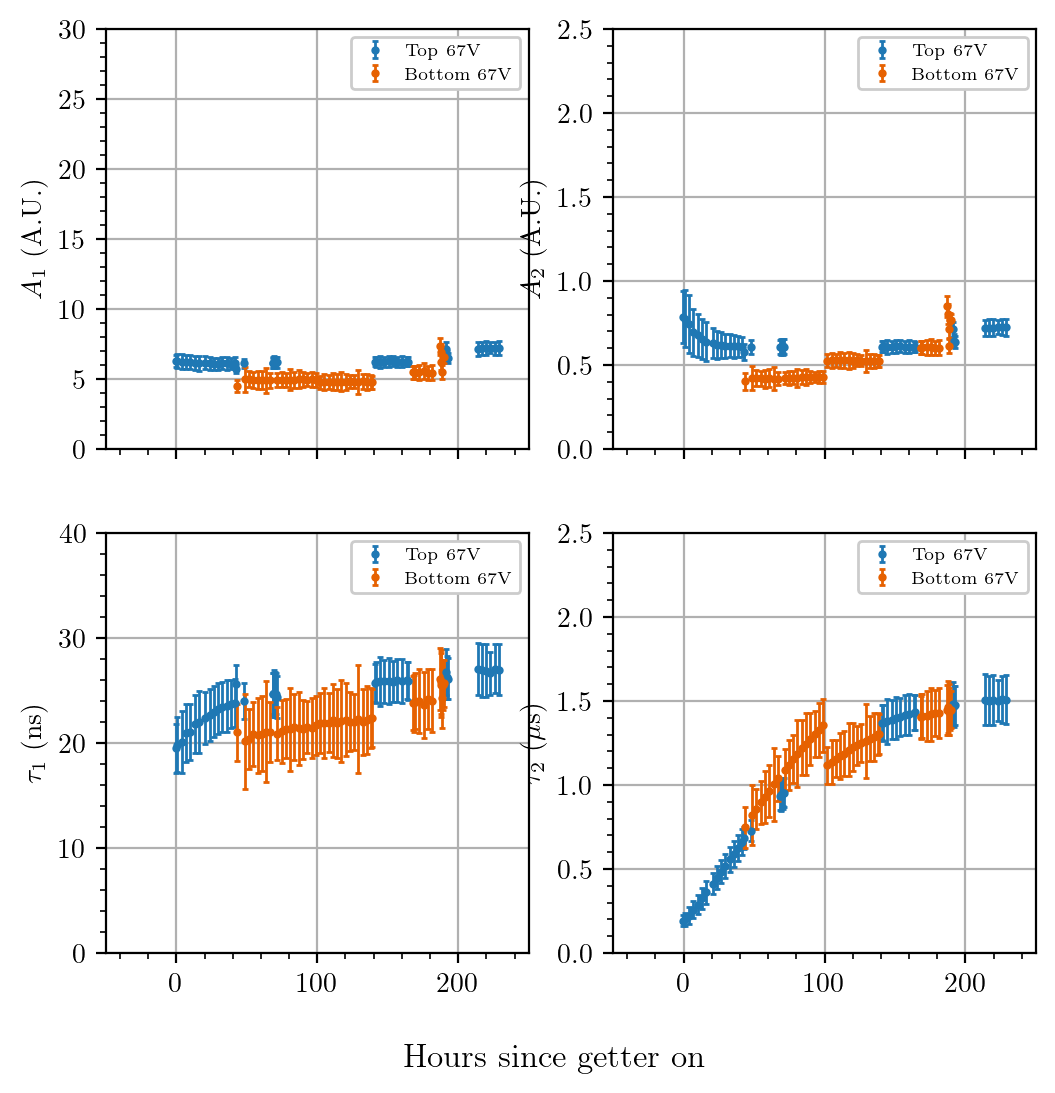

In [28]:
# Make plots for all parameters
# Triplet evolution
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
fig.set_size_inches(6, 6)

for pos in positions:
    axs[0, 0].errorbar(
        triplet_fit[pos]['days']*24,
        triplet_fit[pos]['a1'],
        yerr=triplet_fit[pos]['a1err'],
        label=f'{pos[0].upper()}{pos[1:]} 67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
    axs[0, 0].set_ylabel(r'$A_1$ (A.U.)')
    axs[0, 0].set_ylim(0,30)

    axs[0, 1].errorbar(
        triplet_fit[pos]['days']*24,
        triplet_fit[pos]['a2'],
        yerr=triplet_fit[pos]['a2err'],
        label=f'{pos[0].upper()}{pos[1:]} 67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
    axs[0, 1].set_ylabel(r'$A_2$ (A.U.)')
    axs[0, 1].set_ylim(0,2.5)

    axs[1, 0].errorbar(
        triplet_fit[pos]['days']*24,
        triplet_fit[pos]['tau1']*1e3,
        yerr=triplet_fit[pos]['tau1err']*1e3,
        label=f'{pos[0].upper()}{pos[1:]} 67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
    axs[1, 0].set_ylabel(r'$\tau_1$ (ns)')
    axs[1, 0].set_ylim(0,40)

    axs[1, 1].errorbar(
        triplet_fit[pos]['days']*24,
        triplet_fit[pos]['tau2'],
        yerr=triplet_fit[pos]['tau2err'],
        label=f'{pos[0].upper()}{pos[1:]} 67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
    axs[1, 1].set_ylabel(r'$\tau_2$ ($\mu$s)')
    axs[1, 1].set_ylim(0,2.5)

for i in range(2):
    for j in range(2):
        axs[i, j].legend(loc='upper right',fontsize=6)
        axs[i, j].minorticks_on()
        axs[i, j].grid()
        axs[i, j].set_xlim(-50,250)
fig.supxlabel('Hours since getter on')